<a href="https://colab.research.google.com/github/navgaur/QM1_UGCF/blob/main/Quantum_Mech_1_UGCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Mechanics 1 for UGCF Quantum Mechanics 1 Lab (DSC paper)**

---

## **Visualize the spherical harmonics by plotting the probability density for various values of the quantum numbers (l,m)**

Spherical Harmonics are the solutions of Laplace Equation:

$$∇^2 T (r,\theta, \phi) = 0$$

This eqn can be solved by using method of seperation of variables:
$$T (r,\theta, \phi) = R(r) Θ(\theta) \Phi(\phi) $$

The $\phi$ solution:
$$ \Phi(\phi) = e^{im\phi} ~~, ~~ e^{-im\phi}$$
with $m=0,1,2,3,...$


This will give a radial equation:

$$r^2 \frac{d^2 R}{dr^2} + 2 r \frac{dR}{dr} - \ell (\ell+1) R = 0$$

with the solution:

$$R(r) = r^\ell ~~, ~~  r^{-\ell-1} $$

The $\Theta(\theta)$ solution is in form of Associated Legendre Polynomails

$$ y  = \Theta(\theta) = P_\ell^m(cos\theta)$$
with $m = -\ell, -\ell+1, ...., \ell-1, \ell$, $\ell$ is a non-negative integer.

Traditionally the solution of Laplace Equation in spherical harmonics is written as
$$ Y_\ell^m (\theta,\phi) =
(-1)^m \sqrt{ \frac{(2\ell+1)}{4 \pi} \frac{(\ell-m)!}{(\ell + m)!} }
  P_\ell^m (cos\theta) e^{im\phi} $$
  



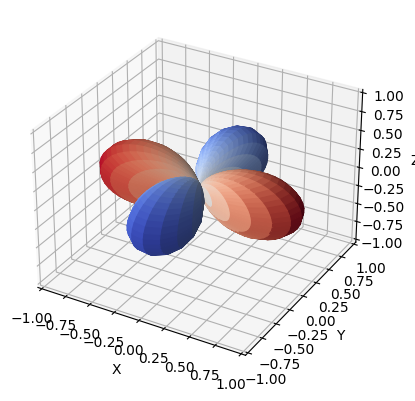

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

# resolution - increase this to get a smoother plot
#  at the cost of slower processing
N = 50

# Create matrices of polar, azimuthal angle points to plot
theta = np.linspace(0, np.pi, N)
phi = np.linspace(0, 2*np.pi, N)
theta, phi = np.meshgrid(theta, phi)

# Calculate the spherical harmonic Y(l,m)
# https://en.wikipedia.org/wiki/Table_of_spherical_harmonics
# uncomment one of the lines below to plot that example
# Y(0, 0)
# Yvals = 0.5 * np.sqrt(1 / np.pi) * np.ones(theta.shape)
# Y(1, 1)
# Yvals = -0.5 * np.sqrt(1.5 / np.pi) * np.cos(phi) * np.sin(theta)
# Y(2, 2)
Yvals = 0.25 * np.sqrt(7.5 / np.pi) * np.cos(2 * phi) * np.sin(theta)**2

# Make some adjustments for nice plots
Ymax, Ymin = Yvals.max(), Yvals.min()
if (Ymax != Ymin):
# normalize the values to [1, -1]
    Yvals = 2 * (Yvals - Ymin)/(Ymax - Ymin) - 1
# Use the absolute value of Y(l,m) as the radius
    radii = np.abs(Yvals)
# put the colors in the range [1, 0]
    Ycolors = 0.5 * (Yvals + 1)
else:
# can't normalize b/c Y(0,0) is single-valued
    radii = np.ones(Yvals.shape)
    Ycolors = np.ones(Yvals.shape)

# Compute Cartesian coordinates of the surface
x = radii * np.sin(theta) * np.cos(phi)
y = radii * np.sin(theta) * np.sin(phi)
z = radii * np.cos(theta)

# Do the actual plotting
# negative values will be blue, positive red
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.coolwarm(Ycolors))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

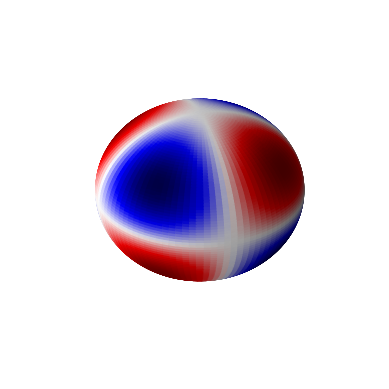

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()